In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv('data/train.csv').drop(columns=['PassengerId'])
test = pd.read_csv('data/test.csv').drop(columns=['PassengerId'])

test['Survived'] = np.nan
test= test.set_index(test.index + 891)
train = pd.concat([train, test])

train

Survived  Pclass                                               Name  \
0          0.0       3                            Braund, Mr. Owen Harris   
1          1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2          1.0       3                             Heikkinen, Miss. Laina   
3          1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4          0.0       3                           Allen, Mr. William Henry   
...        ...     ...                                                ...   
1304       NaN       3                                 Spector, Mr. Woolf   
1305       NaN       1                       Oliva y Ocana, Dona. Fermina   
1306       NaN       3                       Saether, Mr. Simon Sivertsen   
1307       NaN       3                                Ware, Mr. Frederick   
1308       NaN       3                           Peter, Master. Michael J   

         Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0       male  22.0      1      0           A/5 21171    7.2500   NaN        S  
1     female  38.0      1      0            PC 17599   71.2833   C85        C  
2     female  26.0      0      0    STON/O2. 3101282    7.9250   NaN        S  
3     female  35.0      1      0              113803   53.1000  C123        S  
4       male  35.0      0      0              373450    8.0500   NaN        S  
...      ...   ...    ...    ...                 ...       ...   ...      ...  
1304    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
1305  female  39.0      0      0            PC 17758  108.9000  C105        C  
1306    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307    male   NaN      0      0              359309    8.0500   NaN        S  
1308    male   NaN      1      1                2668   22.3583   NaN        C  

[1309 rows x 11 columns]

**NULL elements:**

In [3]:
train.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

**OUTLIERS:**

In [4]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'S': 'S', 'C': 'C', 'Q': 'Q', np.nan: 'C'})
outlier = [258, 679, 737, 159, 180, 201, 324, 792, 846, 863]
train = train.drop(outlier)

In [5]:
train.describe()

Survived       Pclass          Sex          Age        SibSp  \
count  881.000000  1299.000000  1299.000000  1043.000000  1299.000000   
mean     0.384790     2.294072     0.355658    29.865455     0.459584   
std      0.486822     0.837150     0.478897    14.431231     0.887609   
min      0.000000     1.000000     0.000000     0.170000     0.000000   
25%      0.000000     2.000000     0.000000    21.000000     0.000000   
50%      0.000000     3.000000     0.000000    28.000000     0.000000   
75%      1.000000     3.000000     1.000000    39.000000     1.000000   
max      1.000000     3.000000     1.000000    80.000000     8.000000   

             Parch         Fare  
count  1299.000000  1298.000000  
mean      0.376443    31.992796  
std       0.860411    46.476273  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    30.646850  
max       9.000000   512.329200

**STATISTICS:**

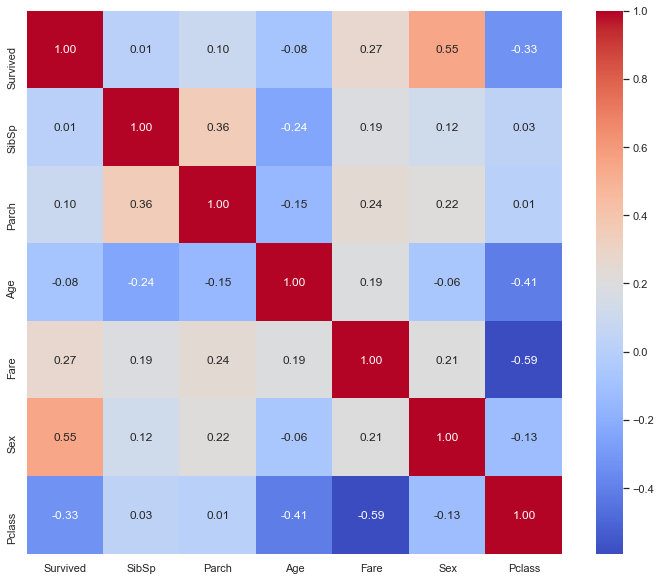

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare', 'Sex', 'Pclass']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

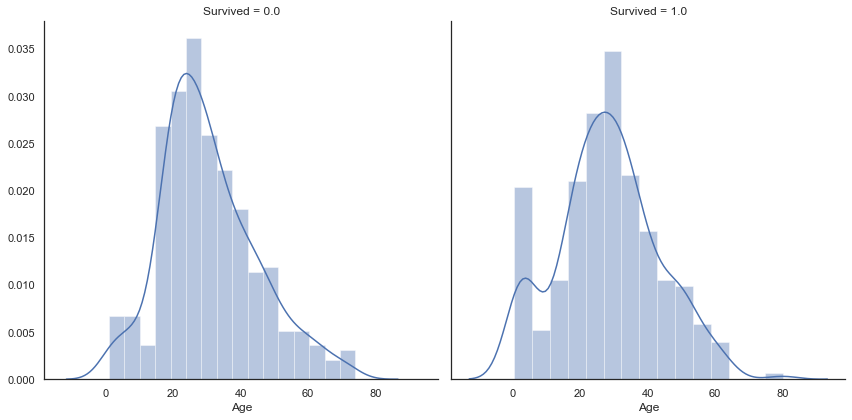

In [7]:
g = sns.FacetGrid(train, col='Survived', height=6)
g.map(sns.distplot, 'Age')
plt.show()

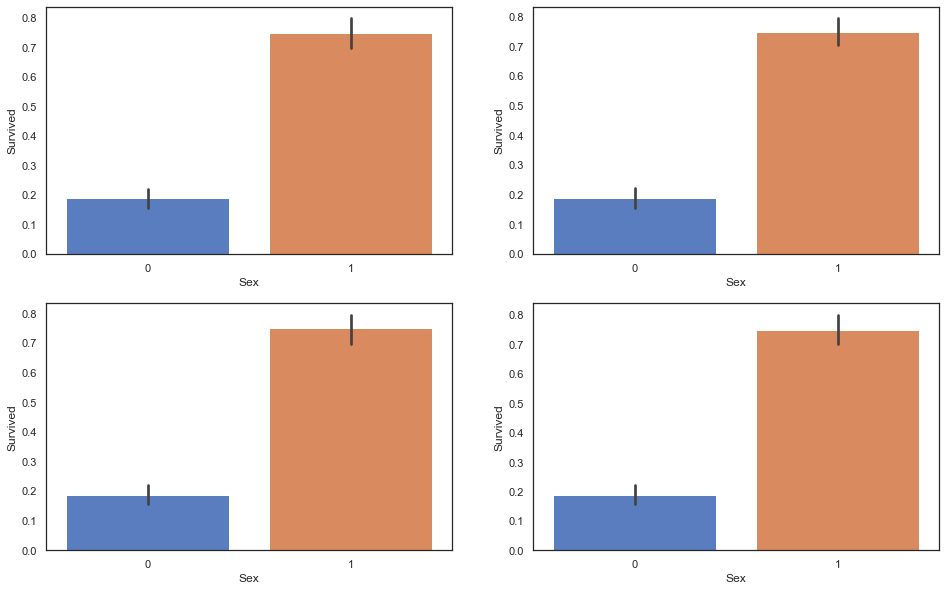

In [8]:
fg, axs = plt.subplots(2, 2, figsize=(16, 10))
sns.barplot(x='Sex', y='Survived', data=train, palette = "muted", ax=axs[0, 0])
sns.barplot(x='Sex', y='Survived', data=train, palette = "muted", ax=axs[0, 1])
sns.barplot(x='Sex', y='Survived', data=train, palette = "muted", ax=axs[1, 0])
sns.barplot(x='Sex', y='Survived', data=train, palette = "muted", ax=axs[1, 1])

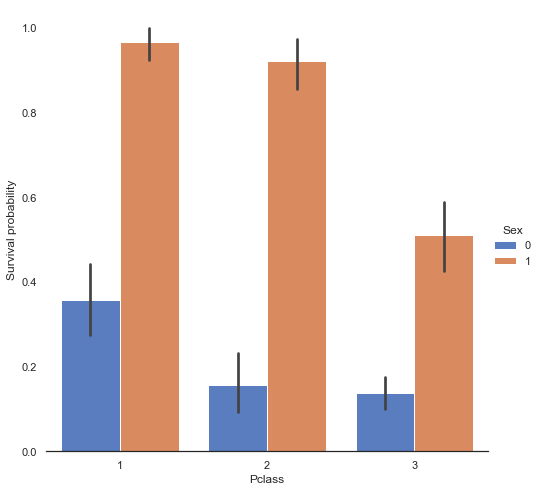

In [9]:
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar', palette = "muted", height=7)
g.despine(left=True)
g.set_ylabels('Survival probability')
plt.show()

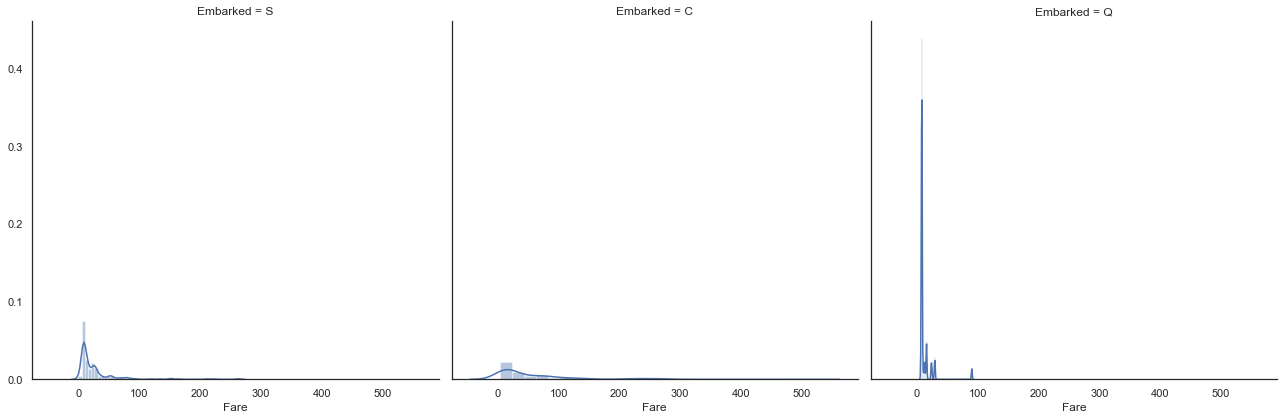

In [10]:
g = sns.FacetGrid(train, col='Embarked', height=6)
g.map(sns.distplot, 'Fare')
plt.show()

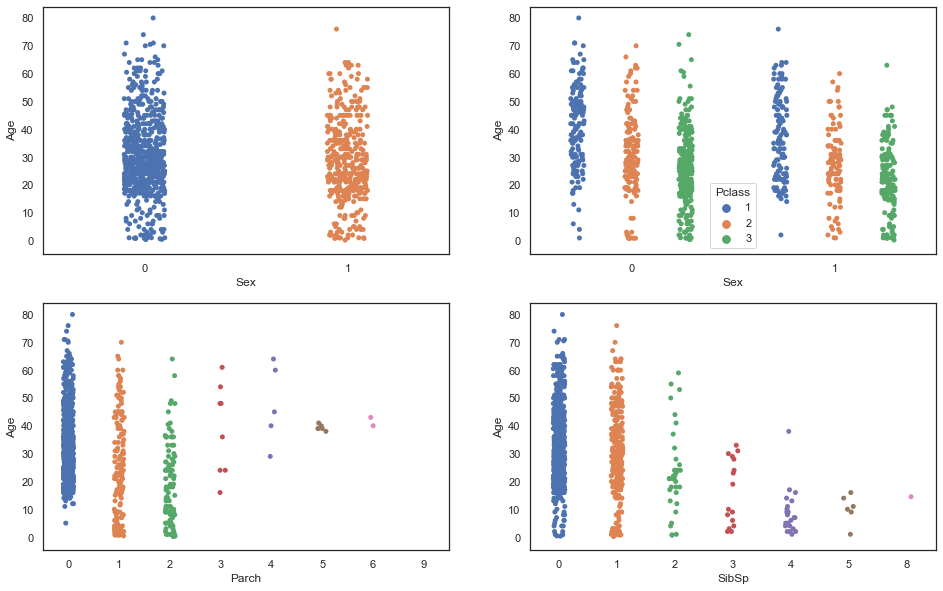

In [11]:
fg, axs = plt.subplots(2, 2, figsize=(16, 10))
sns.stripplot(y='Age', x='Sex', data=train, ax=axs[0, 0])
sns.stripplot(y='Age', x='Sex', hue="Pclass", data=train, dodge=True, ax=axs[0, 1])
sns.stripplot(y='Age', x="Parch", data=train, ax=axs[1, 0])
sns.stripplot(y='Age', x="SibSp", data=train, ax=axs[1, 1])

**FARE:**

In [12]:
train.loc[1043, 'Fare'] = train.loc[(train['Age'] < 70) & (train['Age'] > 50) & (train['SibSp'] == 0) & (train['Parch'] == 0) & (train['Sex'] == 0), 'Fare'].mean()

**AGE:**

In [13]:
age_nan_id_list = list(train.index[train['Age'].isna()])
for i in age_nan_id_list:
    pclass = train.loc[i, 'Pclass']
    parch  = train.loc[i, 'Parch']
    sibsp  = train.loc[i, 'SibSp']
    tmp = train.loc[(train['Pclass'] == pclass) & (train['Parch'] == parch) & (train['SibSp'] == sibsp)]['Age']
    train.at[i, 'Age'] = tmp.median()
#outliers
train.loc[1233, 'Age'] = 15
train.loc[1256, 'Age'] = 15

**CABIN:**

In [14]:
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'] ], index=train.index)

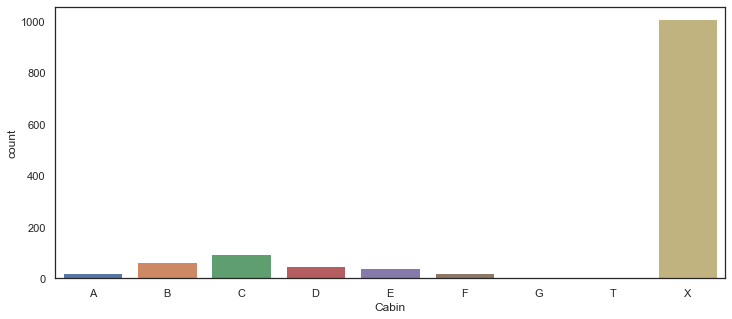

In [15]:
plt.figure(figsize=(12, 5))
sns.countplot(train['Cabin'], order=['A','B','C','D','E','F','G','T','X'])
plt.show()

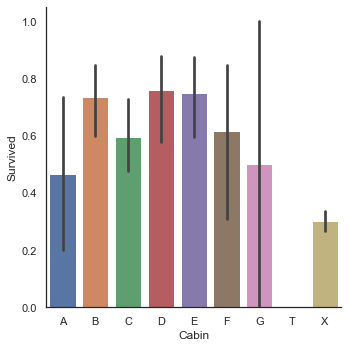

In [16]:
sns.catplot(y="Survived",x="Cabin",data=train,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
plt.show()

**NAMES:**

In [17]:
train['Name'] = pd.Series([i.split(',')[1].split('.')[0].strip() for i in train['Name']], index=train.index)
train['Name'] = train['Name'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir',
                                       'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer'], 'Rare')
train['Name'] = train['Name'].map({'Master': 'Master', 'Mr': 'Mr', 'Mrs': 'Ms',
                                   'Miss': 'Ms', 'Mme': 'Ms', 'Ms': 'Ms', 'Rare': 'Rare'})

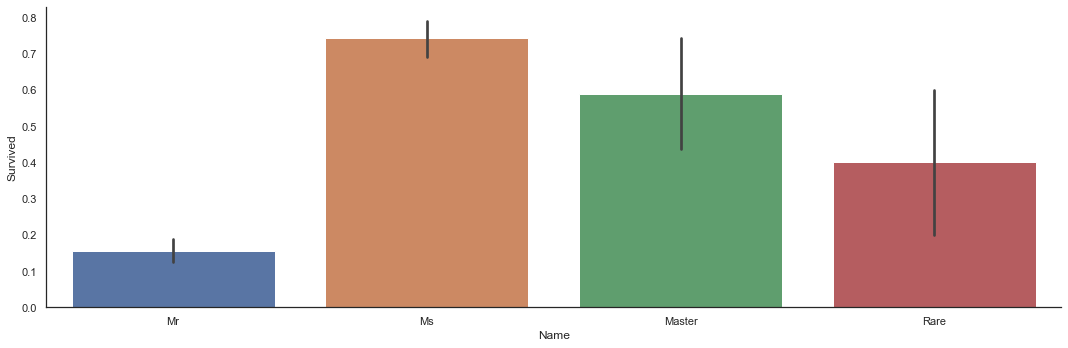

In [18]:
sns.catplot(x='Name', y='Survived', data=train, kind='bar', aspect=3, height=5)

**TICKETS:**

In [19]:
train['Ticket'] = pd.Series(['X' if i.isdigit() else i.replace('/', '').replace('.', '').strip().split()[0] for i in train['Ticket']], index=train.index)

In [20]:
train['Ticket'] = train['Ticket'].replace(['STONO2', 'PP', 'SCParis', 'SCA4', 'A4', 'SP', 'SOC',
                                           'WEP', 'C', 'SCPARIS', 'SOP', 'Fa', 'LINE', 'FCC', 'SWPP',
                                           'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON',
                                           'SCA3', 'AQ4', 'A', 'LP', 'AQ3'], 'Extra')

In [21]:
train['Ticket'].unique()

array(['A5', 'PC', 'Extra', 'X', 'CA', 'WC', 'SOTONOQ', 'STONO', 'STONOQ'],
      dtype=object)

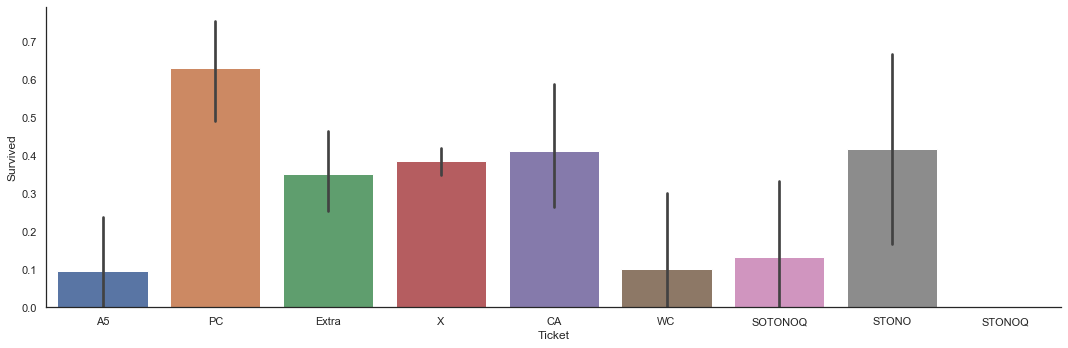

In [22]:
sns.catplot(x='Ticket', y='Survived', data=train, kind='bar', aspect=3, height=5)

**DATA:**

In [23]:
train['Age'] = (train['Age'] - train['Age'].mean()) / train['Age'].std()
train['Fare'] = (train['Fare'] - train['Fare'].mean()) / train['Fare'].std()

data = train
data = pd.get_dummies(data, columns=['Pclass'], prefix='pc')
data = pd.get_dummies(data, columns=['Name'], prefix='name')
data = pd.get_dummies(data, columns=['SibSp'], prefix='ss')
data = pd.get_dummies(data, columns=['Parch'], prefix='pr')
data = pd.get_dummies(data, columns=['Ticket'], prefix='tt')
data = pd.get_dummies(data, columns=['Cabin'], prefix='cab')
data = pd.get_dummies(data, columns=['Embarked'], prefix='em')

y_train = data['Survived'][data['Survived'].notnull()]
X_train = data[data['Survived'].notnull()].drop(columns=['Survived'])
X_test = data[data['Survived'].isna()].drop(columns=['Survived'])

In [24]:
X_test

Sex       Age      Fare  pc_1  pc_2  pc_3  name_Master  name_Mr  \
891     0  0.396857 -0.519917     0     0     1            0        1   
892     1  1.337812 -0.537765     0     0     1            0        0   
893     0  2.466957 -0.479919     0     1     0            0        1   
894     0 -0.167716 -0.501981     0     0     1            0        1   
895     1 -0.544097 -0.423956     0     0     1            0        0   
...   ...       ...       ...   ...   ...   ...          ...      ...   
1304    0 -0.318268 -0.515165     0     0     1            0        1   
1305    1  0.735601  1.655548     1     0     0            0        0   
1306    0  0.697963 -0.532384     0     0     1            0        1   
1307    0 -0.318268 -0.515165     0     0     1            0        1   
1308    0 -0.995756 -0.207190     0     0     1            1        0   

      name_Ms  name_Rare  ...  cab_C  cab_D  cab_E  cab_F  cab_G  cab_T  \
891         0          0  ...      0      0      0      0      0      0   
892         1          0  ...      0      0      0      0      0      0   
893         0          0  ...      0      0      0      0      0      0   
894         0          0  ...      0      0      0      0      0      0   
895         1          0  ...      0      0      0      0      0      0   
...       ...        ...  ...    ...    ...    ...    ...    ...    ...   
1304        0          0  ...      0      0      0      0      0      0   
1305        0          0  ...      1      0      0      0      0      0   
1306        0          0  ...      0      0      0      0      0      0   
1307        0          0  ...      0      0      0      0      0      0   
1308        0          0  ...      0      0      0      0      0      0   

      cab_X  em_C  em_Q  em_S  
891       1     0     1     0  
892       1     0     0     1  
893       1     0     1     0  
894       1     0     0     1  
895       1     0     0     1  
...     ...   ...   ...   ...  
1304      1     0     0     1  
1305      0     1     0     0  
1306      1     0     0     1  
1307      1     0     0     1  
1308      1     1     0     0  

[418 rows x 46 columns]

**MODELING:**

In [25]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [26]:
kfold = StratifiedKFold(n_splits=10)

**SVM:**

In [27]:
svm = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVM = GridSearchCV(svm, param_grid=svc_param_grid, cv=kfold, scoring='accuracy', n_jobs=4, verbose=1)

gsSVM.fit(X_train,y_train)

SVM_best = gsSVM.best_estimator_
gsSVM.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   24.0s finished


0.8331716036772215

**DTC (ADA):**

In [28]:
dtc = DecisionTreeClassifier()
ada = AdaBoostClassifier(dtc)

ada_param_grid = {'base_estimator__criterion' : ['gini', 'entropy'],
                  'base_estimator__splitter' :  ['best', 'random'],
                  'algorithm' : ['SAMME','SAMME.R'],
                  'n_estimators' :[1,2],
                  'learning_rate':  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsDTC = GridSearchCV(ada, param_grid=ada_param_grid, cv=kfold, scoring='accuracy', n_jobs=4, verbose=1)
gsDTC.fit(X_train, y_train)
DTC_best = gsDTC.best_estimator_
gsDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    3.2s finished


0.8161516853932586

**RFC:**

In [29]:
rfc = RandomForestClassifier()

rfc_param_grid = {'max_depth': [None],
                  'max_features': [1, 3, 10],
                  'min_samples_split': [2, 3, 10],
                  'min_samples_leaf': [1, 3, 10],
                  'bootstrap': [False],
                  'n_estimators' :[100,300],
                  'criterion': ['gini']}

gsRFC = GridSearchCV(rfc, param_grid=rfc_param_grid, cv=kfold, scoring='accuracy', n_jobs=4, verbose=1)
gsRFC.fit(X_train, y_train)
RFC_best = gsRFC.best_estimator_
gsRFC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   31.2s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   46.6s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   47.1s finished


0.8331716036772218

**ETC:**

In [30]:
etc = ExtraTreesClassifier()

etc_param_grid = {'max_depth': [None],
                  'max_features': [1, 3, 10],
                  'min_samples_split': [2, 3, 10],
                  'min_samples_leaf': [1, 3, 10],
                  'bootstrap': [False],
                  'n_estimators' :[100,300],
                  'criterion': ['gini']}

gsETC = GridSearchCV(etc, param_grid=etc_param_grid, cv=kfold, scoring='accuracy', n_jobs=4, verbose=1)
gsETC.fit(X_train, y_train)
ETC_best = gsETC.best_estimator_
gsETC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   28.8s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   42.3s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   42.7s finished


0.8308733401430031

**GBC:**

In [31]:
gbc = GradientBoostingClassifier()

gbc_param_grid = {'loss' : ['deviance'],
                  'n_estimators' : [100,200,300],
                  'learning_rate': [0.1, 0.05, 0.01],
                  'max_depth': [4, 8],
                  'min_samples_leaf': [100,150],
                  'max_features': [0.3, 0.1] }
gsGBC = GridSearchCV(gbc, param_grid=gbc_param_grid, cv=kfold, scoring='accuracy', n_jobs=4, verbose=1)
gsGBC.fit(X_train, y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   13.4s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   25.5s finished


0.8263661899897855

**VOTING:**

In [32]:
mod = VotingClassifier(estimators=[('rfc', RFC_best),
                                   ('etc', ETC_best),
                                   ('svc', SVM_best),
                                   ('ada', DTC_best),
                                   ('gbc', GBC_best)], voting='soft', n_jobs=4)
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test).astype(int)

In [33]:
ans = pd.DataFrame({'PassengerId':X_test.index + 1, 'Survived': y_pred}).set_index('PassengerId')
ans.to_csv('result.csv')